In [2]:
import pandas as pd  # 导入 pandas 库，用于数据处理
import matplotlib.pyplot as plt  # 导入 matplotlib 的 pyplot 模块，用于绘图

# 从 CSV 文件读取数据到 info 变量
info = pd.read_csv('./data/meal_order_info.csv', encoding='utf-8')  
# 从另一个 CSV 文件读取数据到 info_before 变量
info_before = pd.read_csv('./data/info_new.csv', encoding='utf-8')  
# 将 info_before 和 info 沿行方向（默认）合并，并将结果存储在 info_all 中
info_all = pd.concat([info_before, info])  
# 打印各表的维数（行数和列数）
print('查看各表的维数：\n', info.shape, info_before.shape, info_all.shape)

查看各表的维数：
 (945, 21) (6611, 21) (7556, 21)


<function matplotlib.pyplot.close(*args)>

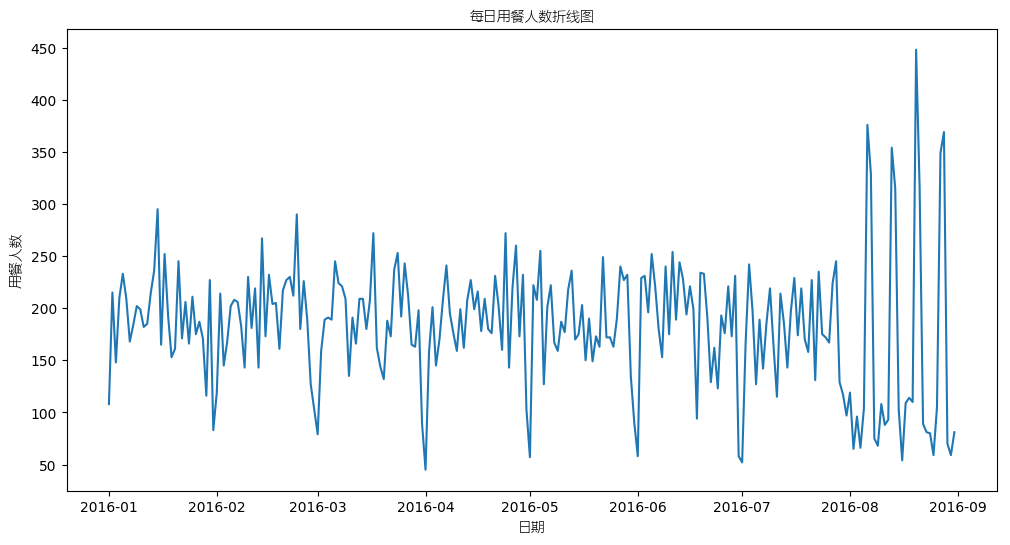

In [4]:
import matplotlib.font_manager as font_manager
# 导入字体管理器，用于处理字体相关问题
font = font_manager.FontProperties(fname='./work/msyhl.ttc')
# 筛选出订单状态为'1'的数据，并重置索引
info = info_all[info_all['order_status'].isin(['1'])]
info = info.reset_index(drop=True)
# 对'use_start_time'列进行处理，转换为日期格式
for i, k in enumerate(info['use_start_time']):
    y = k.split()
    y = pd.to_datetime(y[0])
    info.loc[i, 'use_start_time'] = y
# 按照'use_start_time'列对指定列进行分组，并求和
groupbyday = info[['use_start_time', 'number_consumers', 'accounts_payable']].groupby(by='use_start_time')
sale_day = groupbyday.sum()
sale_day.columns = ['人数', '销量']
# 创建一个图形，指定大小
plt.figure(figsize=(12, 6))
# 设置图形标题，使用指定字体
plt.title('每日用餐人数折线图',fontproperties=font)
# 设置 X 轴标签，使用指定字体
plt.xlabel('日期',fontproperties=font)
# 设置 Y 轴标签，使用指定字体
plt.ylabel('用餐人数',fontproperties=font)
# 绘制折线图
plt.plot(sale_day['人数'])
# 关闭图形
plt.close

<function matplotlib.pyplot.close(*args)>

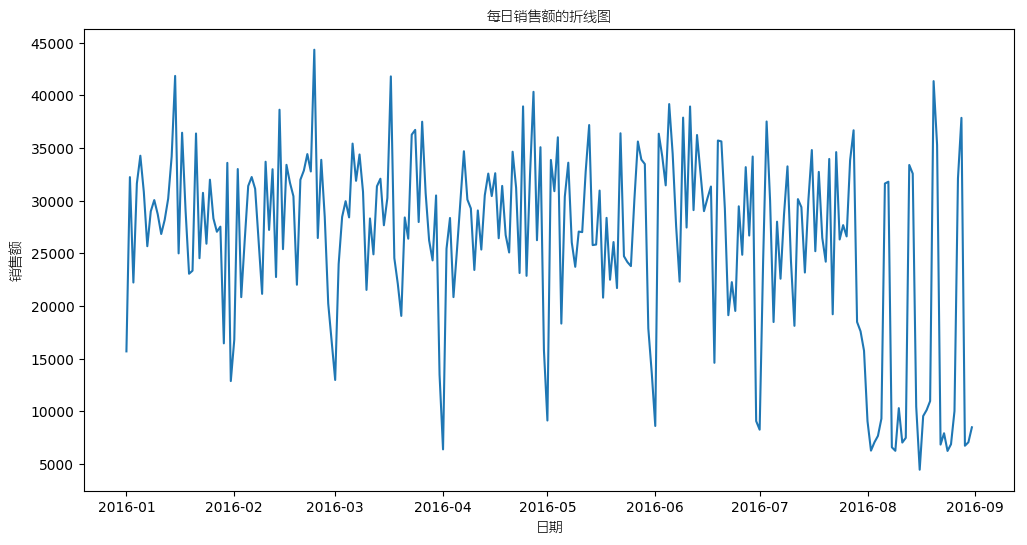

In [61]:
# 创建一个图形，并指定图形的大小为 12 宽、6 高
plt.figure(figsize=(12, 6))
# 设置图形的标题为'每日销售额的折线图'，并使用指定的字体
plt.title('每日销售额的折线图',fontproperties=font)
# 设置 X 轴的标签为'日期'，并使用指定的字体
plt.xlabel('日期',fontproperties=font)
# 设置 Y 轴的标签为'销售额'，并使用指定的字体
plt.ylabel('销售额',fontproperties=font)
# 绘制'sale_day'数据中'销量'列的折线图
plt.plot(sale_day['销量'])
# 关闭图形
plt.close

In [5]:
# 代码 7-2
# 从 CSV 文件 './data/meal_order_info.csv' 读取数据到 info_august 变量，指定编码为 'utf-8'
info_august = pd.read_csv('./data/meal_order_info.csv', encoding='utf-8')

# 从 CSV 文件 './data/users.csv' 读取数据到 users_august 变量，指定编码为 'gbk'
users_august = pd.read_csv('./data/users.csv', encoding='gbk')

# 从 info_august 中筛选出订单状态为 '1' 的数据，并将结果存储在 info_august_new 中
info_august_new = info_august[info_august['order_status'].isin(['1'])]

# 重置 info_august_new 的索引，且不保留原来的索引
info_august_new = info_august_new.reset_index(drop=True)

# 打印提取的订单数据（即 info_august_new）的维数
print('提取的订单数据维数：', info_august_new.shape)  
# 将 info_august_new 数据保存为 CSV 文件，不包含索引列，编码为 'utf-8'
info_august_new.to_csv('./data/info_august_new.csv', index=False, encoding='utf-8')

提取的订单数据维数： (933, 21)


In [63]:
for i in range(1, len(info_august_new)):
    # 根据条件筛选 users_august 中的数据，获取索引列表
    num = users_august[users_august['USER_ID'] == info_august_new.iloc[i-1, 1]].index.tolist()
    # 更新 users_august 中对应索引位置的特定列的值
    users_august.iloc[num[0], 14] = info_august_new.iloc[i-1, 9]
    users_august.iloc[num[0], 14] = info_august_new.iloc[i-1, 9]

user = users_august
# 填充 'LAST_VISITS' 列中的空值为 999
user['LAST_VISITS'] = user['LAST_VISITS'].fillna(999)
# 删除 'LAST_VISITS' 列值为 999 的行
user = user.drop(user[user['LAST_VISITS'] == 999].index.tolist())
# 选取指定的列
user = user.iloc[:, [0, 2, 12, 14]]
# 打印前几行数据
print(user.head())
# 将处理后的用户数据保存为 CSV 文件
user.to_csv('./data/users_august.csv', index=False, encoding='utf-8')

   USER_ID ACCOUNT          FIRST_VISIT         LAST_VISITS
2      982     叶亦凯   2014/8/18 21:41:57  2016/8/26 13:53:46
3      983     邓彬彬   2015/8/23 13:47:17  2016/8/21 17:16:00
4      984     张建涛  2014/12/24 19:26:30  2016/8/25 11:32:59
6      986     莫子建   2014/9/11 11:38:10  2016/8/20 11:15:06
7      987     易子歆   2015/2/24 21:25:34  2016/8/28 12:34:59


In [64]:
# 代码 7-3
# 读取数据并添加维数
users = pd.read_csv('./data/user_loss.csv', encoding='gbk')
info = pd.read_csv('./data/info_new.csv', encoding='utf-8')
print('历史客户信息表的维数：', users.shape)
print('历史订单表的维数：', info.shape)

历史客户信息表的维数： (2431, 38)
历史订单表的维数： (6611, 21)


In [65]:
# 将 users 表中的 'CREATED' 列转换为日期时间类型
users['CREATED'] = pd.to_datetime(users['CREATED'])
# 将 info 表中的 'use_start_time' 列转换为日期时间类型
info['use_start_time'] = pd.to_datetime(info['use_start_time'])
# 将 info 表中的 'lock_time' 列转换为日期时间类型
info['lock_time'] = pd.to_datetime(info['lock_time'])

for i in range(len(users)):
    # 根据条件筛选 info 表中的数据，并获取对应的行索引列表
    info1 = info.iloc[info[info['name'] == users.iloc[i, 2]].index.tolist(), :]
    # 如果满足条件的行数不为 0
    if sum(info['name']==users.iloc[i, 2])!= 0:
        # 更新 users 表中对应行的特定列的值为筛选出的 info1 中 'use_start_time' 列的最大值
        users.iloc[i, 14] = max(info1['use_start_time'])

# 从 info 表中筛选出 'order_status' 为 1 的数据，并选取指定的列
info = info.loc[info['order_status'] == 1, ['emp_id', 'number_consumers', 'expenditure']]
# 重命名列名
info = info.rename(columns={'emp_id': 'USER_ID'})
# 打印前几行数据
print(info.head())

   USER_ID  number_consumers  expenditure
0     3556                 4          423
1     1874                 7         1101
2     3484                 5          437
3     3639                 2          251
4     3835                 2          363


In [66]:
# 从 users 表中选取指定的列，存储到 user 变量中
user = users.iloc[:, [0, 2, 14, 37]]
# 打印 user 表的前几行
print(user.head())

# 基于 'USER_ID' 列，将 user 表和 info 表进行左连接合并，结果存储在 info_user 变量中
info_user = pd.merge(user, info, left_on='USER_ID', right_on='USER_ID', how='left')
# 将合并后的 info_user 表保存为 CSV 文件
info_user.to_csv('./data/info_user.csv', index=False, encoding='utf-8')
# 打印 info_user 表的前几行
print(info_user.head())

   USER_ID ACCOUNT          LAST_VISITS type
0     3300      艾朵  2016-05-23 21:14:00  非流失
1     3497     艾国真  2016-07-18 13:40:00  非流失
2     2863     艾锦程  2016-04-16 20:51:00  已流失
3     3006      艾穹  2016-03-26 20:47:00  已流失
4     3160     艾融乐  2016-07-17 11:40:00  非流失
   USER_ID ACCOUNT          LAST_VISITS type  number_consumers  expenditure
0     3300      艾朵  2016-05-23 21:14:00  非流失              10.0       1782.0
1     3300      艾朵  2016-05-23 21:14:00  非流失               2.0        345.0
2     3300      艾朵  2016-05-23 21:14:00  非流失              10.0       1295.0
3     3300      艾朵  2016-05-23 21:14:00  非流失               6.0        869.0
4     3497     艾国真  2016-07-18 13:40:00  非流失               3.0        589.0


In [8]:
# 代码 7-4  构建RFM特征

import pandas as pd  # 导入pandas库
from sklearn.preprocessing import StandardScaler  # 从sklearn.preprocessing模块导入StandardScaler
import numpy as np  # 导入numpy库

# 从CSV文件读取数据到info变量
info = pd.read_csv('./data/info_august_new.csv', encoding='utf-8')  
# 从另一个CSV文件读取数据到user变量
user = pd.read_csv('./data/users_august.csv', encoding='utf-8')  

# 计算info表中'emp_id'的出现次数，并重置索引，结果存储在user_value1中
user_value1 = pd.DataFrame(info['emp_id'].value_counts()).reset_index()  
# 重命名列名
user_value1.columns = ['USER_ID', 'F']  
# 打印'F'特征的最大值
print('F特征的最大值：', max(user_value1['F']))  
# 打印'F'特征的最小值
print('F特征的最小值：', min(user_value1['F']))  

# 按'emp_id'对info表中的'emp_id'和'expenditure'进行分组求和，结果存储在user_value2中
user_value2 = info[['emp_id', 'expenditure']].groupby(by='emp_id').sum()  
# 将结果转换为DataFrame并重置索引
user_value2 = pd.DataFrame(user_value2).reset_index()  
# 重命名列名
user_value2.columns = ["USER_ID", "M"]  
# 基于'USER_ID'列将user_value1和user_value2进行合并
user_value = pd.merge(user_value1, user_value2, on='USER_ID')  
# 打印'M'特征的最大值
print('M特征的最大值：', max(user_value['M']))  
# 打印'M'特征的最小值
print('M特征的最小值：', min(user_value['M']))  

# 再次基于'USER_ID'列将user_value和user进行合并
user_value = pd.merge(user_value, user, on='USER_ID')  
# 对'LAST_VISITS'列进行处理，转换为日期时间格式
for i, k in enumerate(user_value['LAST_VISITS']):  
    y = k.split()
    y = pd.to_datetime(y[0])
    user_value.loc[i, 'LAST_VISITS'] = y
# 将'LAST_VISITS'列转换为日期时间格式
last_time = pd.to_datetime(user_value['LAST_VISITS'])
# 定义截止日期
deadline = pd.to_datetime("2016-8-31")
# 计算截止日期与'LAST_VISITS'的时间差，得到'R'特征
user_value['R'] = deadline - last_time
# 打印'R'特征的最大值
print('R特征的最大值：', max(user_value['R']))  
# 打印'R'特征的最小值
print('R特征的最小值：', min(user_value['R']))

F特征的最大值： 10
F特征的最小值： 1
M特征的最大值： 6037
M特征的最小值： 80
R特征的最大值： 30 days 00:00:00
R特征的最小值： 0 days 00:00:00


In [9]:
from sklearn.cluster import KMeans  # 从 sklearn 的聚类模块导入 KMeans 算法

standard = np.load('./data/standard.npz')['arr_0']  # 加载数据

k = 3  # 设定聚类的类别数为 3
kmeans_model = KMeans(n_clusters=k, n_jobs=3, random_state=123)  # 创建 KMeans 模型，指定类别数、并行计算的任务数和随机数种子
fit_kmeans = kmeans_model.fit(standard)  # 对数据进行拟合

print('聚类中心：\n', kmeans_model.cluster_centers_)  # 打印聚类中心
print('样本的类别标签：\n', kmeans_model.labels_)  # 打印样本所属的类别标签
r1 = pd.Series(kmeans_model.labels_).value_counts()  # 统计每个类别的样本数量
print('最终每个类别的数目为：\n', r1)  # 打印每个类别的数目

聚类中心：
 [[-0.46247917 -0.30329708 -0.31029264]
 [-1.22280098  1.70981576  1.63072329]
 [ 0.95856801 -0.55335836 -0.51034304]]
样本的类别标签：
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 2 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 2 0 2 0 2 0 0 0 0 0 2 2 0 2 2 2 2 2 2
 0 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0
 0 2 0 0 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 0 2 0 2 2 0 0 2 0 2 2 2 2 0 2 2
 0 2 0 2 0 0 0 2 0 0 2 0 2 0 2 2 2 2 2 2 0 2 0 0 2 2 2 0 2 2 0 0 2 0 0 0 0
 0 2 0 2 2 2 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2
 2 0 0 2 2 2 2 2 0 2 2 0 0 2 2 2 2 0 0 2 2 2 2 2 0 2 0 0 0 0 0 0 2 0 2 0 2
 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 0

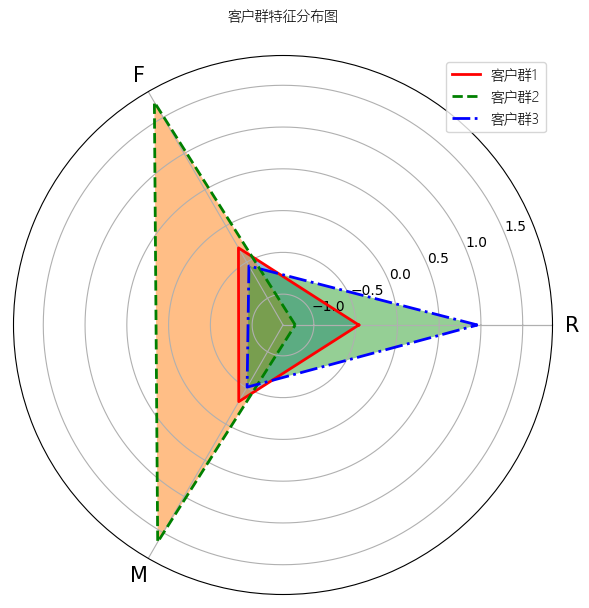

<function matplotlib.pyplot.close(*args)>

In [13]:
# 代码 7-7
%matplotlib inline
import matplotlib.pyplot as plt

N = len(kmeans_model.cluster_centers_[0])  # 获取聚类中心的维度
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)  # 生成角度序列
angles = np.concatenate((angles, [angles[0]]))  # 将起始角度添加到末尾，形成闭环

fig = plt.figure(figsize=(7, 7))  # 创建一个图形，指定大小
ax = fig.add_subplot(111, polar=True)  # 在图形中添加一个极坐标子图

sam = ['r','g','b']  # 颜色列表
lstype = ['-','--','-.']  # 线条类型列表
lab = []  # 用于存储图例标签的列表

for i in range(len(kmeans_model.cluster_centers_)):  # 遍历聚类中心
    values = kmeans_model.cluster_centers_[i]  # 获取当前聚类中心的值
    feature = ['R','F','M']  # 特征标签
    values = np.concatenate((values, [values[0]]))  # 形成闭环
    # 绘制线条和填充区域
    ax.plot(angles, values, sam[i], linestyle=lstype[i], linewidth=2, markersize=10)  
    ax.fill(angles, values, alpha=0.5)  
    # 设置角度网格标签
    ax.set_thetagrids(angles * 180 / np.pi, feature, fontsize=15)  
    plt.title('客户群特征分布图',fontproperties=font)  # 设置图形标题
    ax.grid(True)  # 显示网格
    lab.append('客户群' + str(i+1))  # 添加图例标签

plt.legend(lab,prop=font)  # 显示图例
plt.show()  # 显示图形
plt.close  # 关闭图形

In [14]:
# 代码 7-8
import pandas as pd  # 导入 pandas 库

# 从 CSV 文件读取数据到 info_user 变量
info_user = pd.read_csv('./data/info_user.csv', encoding='utf-8')  

# 计算 info_user 表中 'USER_ID' 的出现次数，并重置索引，结果存储在 info_user1 中
info_user1 = info_user['USER_ID'].value_counts()  
info_user1 = info_user1.reset_index()  
info_user1.columns = ['USER_ID', 'frequence']  # 重命名列名

# 按 'USER_ID' 对 info_user 表中的 'number_consumers' 和 'expenditure' 进行分组求和，结果存储在 info_user2 中
info_user2 = info_user[['number_consumers', "expenditure"]].groupby(info_user['USER_ID']).sum()  
info_user2 = info_user2.reset_index()  # 重置索引
info_user2.columns = ['USER_ID', 'numbers', 'amount']  # 重命名列名

# 基于 'USER_ID' 列将 info_user1 和 info_user2 进行左连接合并，结果存储在 info_user_new 中
info_user_new = pd.merge(info_user1, info_user2, left_on='USER_ID', right_on='USER_ID', how='left')  

# 选取 info_user 表的前 4 列
info_user = info_user.iloc[:, :4]  
# 按 'USER_ID' 对选取的列进行分组，并获取每组的最后一行，结果存储在 info_user 中
info_user = info_user.groupby(['USER_ID']).last()  
info_user = info_user.reset_index()  # 重置索引

# 基于 'USER_ID' 列将 info_user_new 和处理后的 info_user 进行左连接合并
info_user_new = pd.merge(info_user_new, info_user, left_on='USER_ID', right_on='USER_ID', how='left')  
# 打印合并后的 info_user_new 表的前几行
print(info_user_new.head())

   USER_ID  frequence  numbers   amount ACCOUNT          LAST_VISITS type
0     2361         41    237.0  34784.0     薛浩天  2016-07-30 13:29:00  非流失
1     3478         37    231.0  33570.0     帅栎雁  2016-07-27 11:14:00  非流失
2     3430         34    224.0  31903.0     柴承德  2016-07-26 13:38:00  非流失
3     3307         33    199.0  30400.0     葛时逸  2016-07-22 11:28:00  非流失
4     2797         33    198.0  30849.0     关狄梨  2016-07-23 13:28:00  非流失


In [71]:
print('合并后表中的空值数目：', info_user_new.isnull().sum().sum(),'\n')  # 打印合并后表中的空值总数

info_user_new = info_user_new.dropna(axis=0)  # 按行删除含有空值的行

info_user_new = info_user_new[info_user_new['numbers']!= 0]  # 筛选出'numbers'列不为 0 的行

# 计算平均消费金额，并保留 2 位小数
info_user_new['average'] = info_user_new['amount']/info_user_new['numbers']
info_user_new['average'] = info_user_new['average'].apply(lambda x: '%.2f' % x)

info_user_new['LAST_VISITS'] = pd.to_datetime(info_user_new['LAST_VISITS'])  # 将'LAST_VISITS'列转换为日期时间格式

datefinally = pd.to_datetime('2016-7-31')  # 定义一个日期时间对象
time = datefinally - info_user_new['LAST_VISITS']  # 计算与指定日期的时间差
info_user_new['recently'] = time.apply(lambda x: x.days)  # 将时间差转换为天数

info_user_new = info_user_new.loc[:, ['USER_ID', 'ACCOUNT', 'frequence',
                                      'amount', 'average','recently', 'type']]  # 选取指定列

info_user_new.to_csv('./data/info_user_clear.csv', index=False, encoding='gbk')  # 保存为 CSV 文件
print(info_user_new.head())  # 打印前几行数据

合并后表中的空值数目： 46 

   USER_ID ACCOUNT  frequence   amount average  recently type
0     2361     薛浩天         41  34784.0  146.77         0  非流失
1     3478     帅栎雁         37  33570.0  145.32         3  非流失
2     3430     柴承德         34  31903.0  142.42         4  非流失
3     3307     葛时逸         33  30400.0  152.76         8  非流失
4     2797     关狄梨         33  30849.0  155.80         7  非流失


In [15]:
# 代码 7-9
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix

info_user = pd.read_csv('./data/info_user_clear.csv', encoding='gbk')  # 读取 CSV 文件

info_user = info_user[info_user['type']!= "已流失"]  # 筛选出'type'列不为"已流失"的行

model_data = info_user.iloc[:, [2, 3, 4, 5, 6]]  # 选取指定列作为模型数据

# 使用 train_test_split 函数将数据划分为训练集和测试集
x_tr, x_te, y_tr, y_te = train_test_split(model_data.iloc[:, :-1], 
                                          model_data['type'], 
                                          test_size=0.2, random_state=12345)  
dtc = DTC()  # 假设 DTC 是一个自定义的分类器对象
dtc.fit(x_tr, y_tr)  # 在训练集上训练模型
pre = dtc.predict(x_te)  # 在测试集上进行预测
print('预测结果：\n', pre)  # 打印预测结果

预测结果：
 ['准流失' '非流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失'
 '准流失' '非流失' '非流失' '非流失' '非流失' '准流失' '准流失' '准流失' '非流失' '准流失' '非流失' '准流失'
 '准流失' '准流失' '准流失' '非流失' '非流失' '准流失' '准流失' '准流失' '非流失' '非流失' '准流失' '准流失'
 '准流失' '准流失' '准流失' '准流失' '非流失' '非流失' '非流失' '准流失' '准流失' '准流失' '非流失' '准流失'
 '准流失' '非流失' '非流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失' '非流失' '准流失'
 '非流失' '非流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失' '准流失' '非流失' '准流失'
 '准流失' '非流失' '非流失' '非流失' '准流失' '准流失' '非流失' '非流失' '非流失' '准流失' '非流失' '准流失'
 '准流失' '准流失' '准流失' '非流失' '非流失' '非流失' '准流失' '准流失' '非流失' '非流失' '准流失' '非流失'
 '非流失' '非流失' '非流失' '非流失' '准流失' '非流失' '准流失' '非流失' '准流失' '非流失' '准流失' '准流失'
 '非流失' '非流失' '非流失' '准流失' '非流失' '非流失' '准流失' '非流失' '准流失' '准流失' '非流失' '准流失'
 '准流失' '非流失' '非流失' '非流失' '准流失' '非流失' '准流失' '准流失' '准流失' '准流失' '准流失' '非流失'
 '准流失' '准流失' '准流失' '准流失' '非流失' '准流失' '非流失' '准流失' '准流失' '非流失' '准流失' '准流失'
 '非流失' '准流失' '非流失' '非流失' '准流失' '非流失' '非流失' '非流失' '准流失' '准流失' '准流失' '非流失'
 '准流失' '非流失' '准流失' '准流失' '准流失' '准流失' '准流失' '

In [16]:
# 代码 7-10
# 9)	分析决策树模型结果
hx = confusion_matrix(y_te, pre, labels=['非流失', '准流失'])  # 计算测试集真实标签和预测标签的混淆矩阵
print('混淆矩阵：\n', hx)  # 打印混淆矩阵

P = hx[1, 1] / (hx[0, 1] + hx[1, 1])  # 计算精确率（Precision）
print('精确率：', round(P, 3))  # 打印精确率并保留三位小数

R = hx[1, 1] / (hx[1, 0] + hx[1, 1])  # 计算召回率（Recall）
print('召回率：', round(R, 3))  # 打印召回率并保留三位小数

F1 = 2 * P * R / (P + R)  # 计算 F1 值
print('F1 值：', round(F1, 3))  # 打印 F1 值并保留三位小数

混淆矩阵：
 [[153  19]
 [  7 203]]
精确率： 0.914
召回率： 0.967
F1 值： 0.94
